In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

1D Gradient Descent Localization

In [3]:
def get_gaussian_grad_mu(x, sigma, mu):
    dgdmu = 1/(sigma*(2*np.pi)**0.5)*np.exp(-1/2*((x-mu)/sigma)**2)*(x-mu)/sigma**2
    return dgdmu

def get_gaussian_grad_sigma(x, sigma, mu):
    dgdsigma = (np.exp(-1/2*(x-mu)**2/sigma**2)*(x-mu)**2)/(np.sqrt(2*np.pi)*sigma**4)-(np.exp(-1/2*(x-mu)**2/sigma**2))/(np.sqrt(2*np.pi)*sigma**2)
    return dgdsigma

def gaussian(x, sigma, mu):
    gaussian = 1/(sigma*(2*np.pi)**0.5)*np.exp(-1/2*((x-mu)/sigma)**2)
    return gaussian

0, loss is 0.09471764910168139 with sigma: 1.9968846014314046 and mu: 1.993865540975709
1, loss is 0.09424294579736024 with sigma: 1.9937350441049624 and mu: 1.9877398888984235
2, loss is 0.09376714618810877 with sigma: 1.9905513917232178 and mu: 1.981622978187535
3, loss is 0.09329022176276577 with sigma: 1.9873337063156908 and mu: 1.97551474504313
4, loss is 0.092812144284509 with sigma: 1.9840820483143204 and mu: 1.9694151274550158
5, loss is 0.09233288579115294 with sigma: 1.9807964766296298 and mu: 1.963324065212671
6, loss is 0.09185241859590525 with sigma: 1.9774770487276887 and mu: 1.9572414999161356
7, loss is 0.09137071528858942 with sigma: 1.9741238207079546 and mu: 1.9511673749878473
8, loss is 0.09088774873734067 with sigma: 1.9707368473820714 and mu: 1.9451016356854416
9, loss is 0.09040349209078312 with sigma: 1.9673161823537093 and mu: 1.9390442291155232
10, loss is 0.08991791878069773 with sigma: 1.9638618780995256 and mu: 1.9329951042484261
11, loss is 0.0894310025251

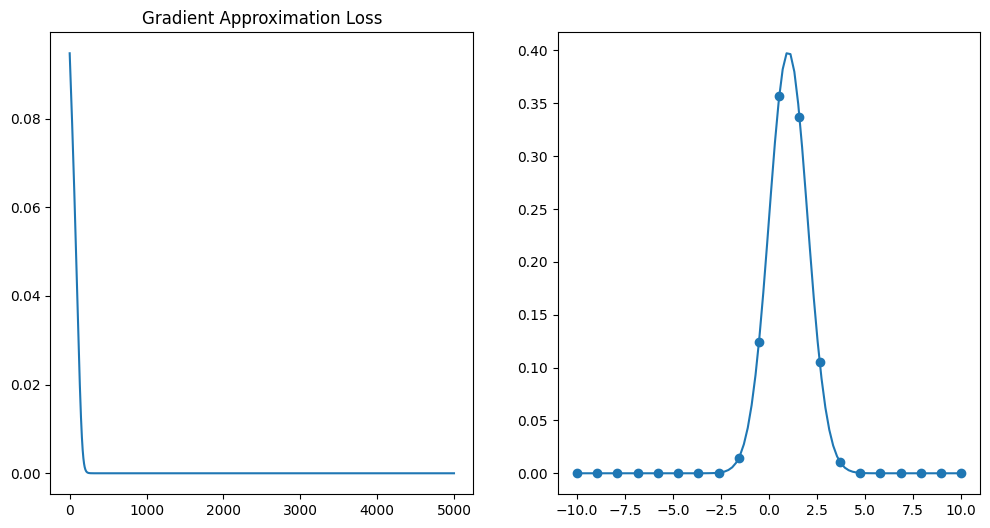

In [5]:
## create data
x = np.linspace(-10,10,20)
y = gaussian(x, 1,1)
# y = gaussian(x, 1, 5) + np.random.randn(len(x))/100
# plt.scatter(x,y)

sigma = 2
mu = 2
lr = 0.1

def descend(x, y, sigma, mu, lr):
    dldmu = 0.0
    dldsigma = 0.0
    N = x.shape[0]
    #loss = (y-yhat)^2
    for xi, yi in zip(x,y):
        dldmu += 2*(yi-gaussian(xi, sigma, mu))*-1*get_gaussian_grad_mu(xi, sigma, mu)
        dldsigma += 2*(yi-gaussian(xi, sigma, mu))*-1*get_gaussian_grad_sigma(xi, sigma, mu)

    sigma = sigma - lr*dldsigma
    mu = mu - lr*dldmu

    return sigma, mu

loss_array = np.array([])
for epoch in range(5000):
    sigma, mu = descend(x,y,sigma, mu, lr)
    yhat = gaussian(x, sigma, mu)
    loss = np.sum((y-yhat)**2,axis=0)
    loss_array = np.append(loss_array, loss)
    print(f'{epoch}, loss is {loss} with sigma: {sigma} and mu: {mu}')

# plt.plot(x, gaussian(x, sigma, mu))
loss_x = np.linspace(0,len(loss_array)-1, len(loss_array))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(loss_x, loss_array)
plt.title("Gradient Approximation Loss")


x_new = np.linspace(-10,10,100)
plt.subplot(122)
plt.scatter(x,y)
plt.plot(x_new, gaussian(x_new, sigma, mu))
print(f'Approximated sigma: {sigma}')
print(f'Approximated mu: {mu}')



2D Gradient Descent Localization

In [7]:
def gaussian_2D(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x * sigma_y)

def get_gaussian_grad_sigma_x(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(x-mu_x)**2 / (2 * np.pi * sigma_x**4 * sigma_y) - np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x**2 * sigma_y)

def get_gaussian_grad_sigma_y(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(y-mu_y)**2 / (2 * np.pi * sigma_x * sigma_y**4) - np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x * sigma_y**2)

def get_gaussian_grad_mu_x(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(x-mu_x) / (2 * np.pi * sigma_x**3 * sigma_y)

def get_gaussian_grad_mu_y(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(y-mu_y) / (2 * np.pi * sigma_x * sigma_y**3)


0, loss is 0.01570260317490343 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.9986533056425364 and mu_y: 0.9984380488248747
1, loss is 0.01566009940284108 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.9973065771225496 and mu_y: 0.996876866293533
2, loss is 0.015617619569177512 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.9959598274295067 and mu_y: 0.9953164634269166
3, loss is 0.015575164357555803 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.9946130695911058 and mu_y: 0.9937568512720882
4, loss is 0.015532734452868544 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.993266316672196 and mu_y: 0.9921980409013168
5, loss is 0.015490330541180661 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.9919195817736932 and mu_y: 0.990640043411157
6, loss is 0.01544795330965179 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.99057287803149 and mu_y: 0.9890828699215228
7, loss is 0.01540560344645837 with sigma_x: 1.0 and sigma_y: 1.0 and mu_x: 0.9892262186153603 and mu_y: 0.9875265315747563
8, loss i

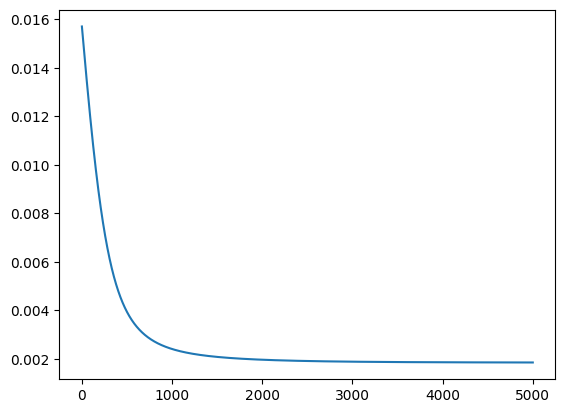

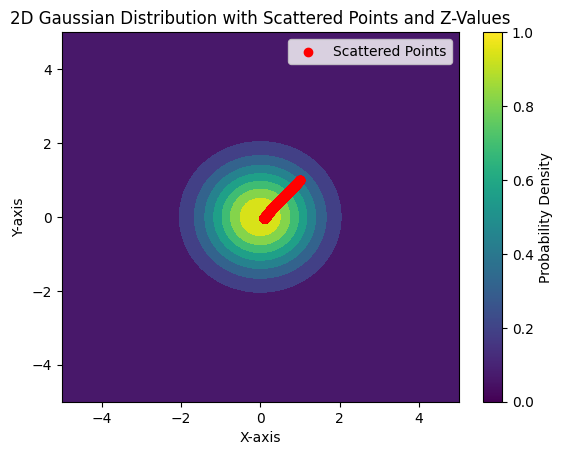

In [16]:
#Gradient Descent
num_points = 5

sigma_x_target = 1
sigma_y_target = 1
mu_x_target = 0
mu_y_target = 0

x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)

X, Y = np.meshgrid(x, y)
Z = gaussian_2D(X, Y, sigma_x_target, sigma_y_target, mu_x_target, mu_y_target)
# Z = Z/np.amax(Z)
Z = Z + np.random.normal(0.0001,0.01, Z.shape)

#Guess parameters
sigma_x = 1
sigma_y = 1
mu_x = 1
mu_y = 1
lr = 0.1

def descend(x, y, Z, sigma_x, sigma_y, mu_x, mu_y, lr):
    dldsigma_x = 0.0
    dldsigma_y = 0.0
    dldmu_x = 0.0
    dldmu_y = 0.0

    X, Y = np.meshgrid(x, y)
    Zhat = gaussian_2D(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_sigma_x = get_gaussian_grad_sigma_x(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_sigma_y = get_gaussian_grad_sigma_y(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_mu_x = get_gaussian_grad_mu_x(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_mu_y = get_gaussian_grad_mu_y(X, Y, sigma_x, sigma_y, mu_x, mu_y)

    #loss = (y-yhat)^2
    for i in range(len(x)):
        for j in range(len(y)):
            # print(x[i], y[j])
            # dldsigma_x += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x[i][j]
            # dldsigma_y += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y[i][j]
            dldmu_x += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x[i][j]
            dldmu_y += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y[i][j]

    sigma_x = sigma_x - lr*dldsigma_x
    sigma_y = sigma_y - lr*dldsigma_y
    mu_x = mu_x - lr*dldmu_x
    mu_y = mu_y - lr*dldmu_y

    return sigma_x, sigma_y, mu_x, mu_y

loss_array = np.array([])
mu_x_list = np.array([])
mu_y_list = np.array([])
loss = 1
epoch = 0
while 5000 > epoch:
    sigma_x, sigma_y, mu_x, mu_y = descend(x, y, Z, sigma_x, sigma_y, mu_x, mu_y, lr)
    mu_x_list = np.append(mu_x_list, mu_x)
    mu_y_list = np.append(mu_y_list, mu_y)
    Zhat = gaussian_2D(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    loss = np.sum((Z-Zhat)**2)
    loss_array = np.append(loss_array, loss)
    print(f'{epoch}, loss is {loss} with sigma_x: {sigma_x} and sigma_y: {sigma_y} and mu_x: {mu_x} and mu_y: {mu_y}')
    epoch += 1

loss_x = np.linspace(0,len(loss_array)-1, len(loss_array))
plt.plot(loss_x, loss_array)
print("sigma_x:", sigma_x, "sigma_y:", sigma_y, "mu_x:", mu_x, "mu_y:", mu_y)

##show path of mu

# Define parameters

# Create grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate Gaussian values
Z = gaussian_2D(X, Y, sigma_x_target, sigma_y_target, mu_x_target, mu_y_target)

# Plot the 2D Gaussian distribution and scattered points with z-values
plt.figure()
plt.contourf(X, Y, Z, cmap='viridis')
plt.scatter(mu_x_list, mu_y_list, color='red', label='Scattered Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Gaussian Distribution with Scattered Points and Z-Values')
plt.colorbar(label='Probability Density')
plt.legend()
plt.show()




2D Gradient Descent Localization 2 Emitters

0, loss is 0.07764841917565662 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9930661603672664 and mu_y1: 0.9999009971427454 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.00010826182982504468 and mu_y2: -0.9930497388264949
1, loss is 0.07669268488778246 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9861559191247093 and mu_y1: 0.9998081320299571 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.00021034296798867156 and mu_y2: -0.9861236475311507
2, loss is 0.07574368797739808 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9792696242988455 and mu_y1: 0.9997213768475492 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.0003062698872623961 and mu_y2: -0.9792220909208075
3, loss is 0.07480149857988344 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9724076173544964 and mu_y1: 0.9996407014339727 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.00039607139384236926 and mu_y2: -0.9723454261805138
4, loss is 0.07386618386504461 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9655

11, loss is 0.0675164968207902 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9184247161773287 and mu_y1: 0.9992098034492007 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.0008981696613275724 and mu_y2: -0.9182685386173673
12, loss is 0.06663824592345881 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9117955718056032 and mu_y1: 0.9991821190581417 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.0009345072856126387 and mu_y2: -0.9116307027223769
13, loss is 0.06576734305356659 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.9051937644111603 and mu_y1: 0.9991600918344832 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.0009651283223332264 and mu_y2: -0.9050209060803929
14, loss is 0.06490382659394997 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.8986195621217794 and mu_y1: 0.9991436683547379 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: 0.0009900848482437689 and mu_y2: -0.8984394208565759
15, loss is 0.06404773217818825 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: 1.892

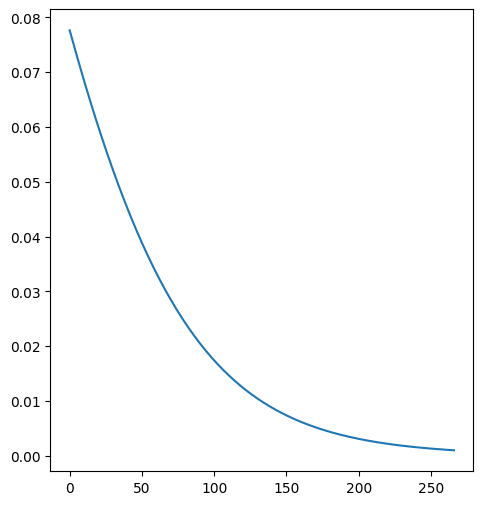

<Figure size 640x480 with 0 Axes>

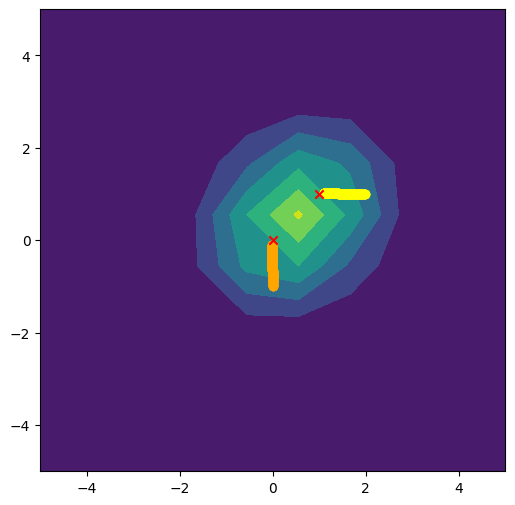

In [15]:
num_points_x_y = 10

sigma_x_target1 = 1
sigma_y_target1 = 1
mu_x_target1 = 1
mu_y_target1 = 1

sigma_x_target2 = 1
sigma_y_target2 = 1
mu_x_target2 = 0
mu_y_target2 = 0

x = np.linspace(-5, 5, num_points_x_y)
y = np.linspace(-5, 5, num_points_x_y)

X, Y = np.meshgrid(x, y)
Z = gaussian_2D(X, Y, sigma_x_target1, sigma_y_target1, mu_x_target1, mu_y_target1)
Z += gaussian_2D(X, Y, sigma_x_target2, sigma_y_target2, mu_x_target2, mu_y_target2)

sigma_x1 = 1
sigma_y1 = 1
mu_x1 = 2
mu_y1 = 1

sigma_x2 = 1
sigma_y2 = 1
mu_x2 = 0
mu_y2 = -1

lr = 0.1


def descend(x, y, Z, sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2, lr):
    dldsigma_x1 = 0.0
    dldsigma_y1 = 0.0
    dldmu_x1 = 0.0
    dldmu_y1 = 0.0
    dldsigma_x2 = 0.0
    dldsigma_y2 = 0.0
    dldmu_x2 = 0.0
    dldmu_y2 = 0.0

    X, Y = np.meshgrid(x, y)
    Zhat = gaussian_2D(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)+gaussian_2D(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_sigma_x1 = get_gaussian_grad_sigma_x(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_sigma_y1 = get_gaussian_grad_sigma_y(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_mu_x1 = get_gaussian_grad_mu_x(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_mu_y1 = get_gaussian_grad_mu_y(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_sigma_x2 = get_gaussian_grad_sigma_x(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_sigma_y2 = get_gaussian_grad_sigma_y(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_mu_x2 = get_gaussian_grad_mu_x(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_mu_y2 = get_gaussian_grad_mu_y(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)

    #loss = (y-yhat)^2
    for i in range(len(x)):
        for j in range(len(y)):
            # # print(x[i], y[j])
            # dldsigma_x1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x1[i][j]
            # dldsigma_y1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y1[i][j]
            dldmu_x1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x1[i][j]
            dldmu_y1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y1[i][j]
            # dldsigma_x2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x2[i][j]
            # dldsigma_y2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y2[i][j]
            dldmu_x2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x2[i][j]
            dldmu_y2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y2[i][j]

    sigma_x1 = sigma_x1 - lr*(1/100)*dldsigma_x1
    sigma_y1 = sigma_y1 - lr*(1/100)*dldsigma_y1
    mu_x1 = mu_x1 - lr*dldmu_x1
    mu_y1 = mu_y1 - lr*dldmu_y1
    sigma_x2 = sigma_x2 - lr*(1/100)*dldsigma_x2
    sigma_y2 = sigma_y2 - lr*(1/100)*dldsigma_y2
    mu_x2 = mu_x2 - lr*dldmu_x2
    mu_y2 = mu_y2 - lr*dldmu_y2

    return sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2


loss_array = np.array([])
mu_x_list1 = np.array([])
mu_y_list1 = np.array([])
mu_x_list2 = np.array([])
mu_y_list2 = np.array([])
loss = 1
epoch = 0
while loss > 1e-3:
    sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2 = descend(x, y, Z, sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2, lr)
    mu_x_list1 = np.append(mu_x_list1, mu_x1)
    mu_y_list1 = np.append(mu_y_list1, mu_y1)
    mu_x_list2 = np.append(mu_x_list2, mu_x2)
    mu_y_list2 = np.append(mu_y_list2, mu_y2)
    Zhat = gaussian_2D(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)+gaussian_2D(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    loss = np.sum((Z-Zhat)**2)
    loss_array = np.append(loss_array, loss)
    print(f'{epoch}, loss is {loss} with sigma_x1: {sigma_x1} and sigma_y1: {sigma_y1} and mu_x1: {mu_x1} and mu_y1: {mu_y1} and sigma_x2: {sigma_x2} and sigma_y2: {sigma_y2} and mu_x2: {mu_x2} and mu_y2: {mu_y2}')
    epoch += 1

loss_x = np.linspace(0,len(loss_array)-1, len(loss_array))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(loss_x, loss_array)



plt.figure()
plt.figure(figsize=(6,6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.scatter(mu_x_list1, mu_y_list1, color='yellow', label='Scattered Points')
plt.scatter(mu_x_list2, mu_y_list2, color='orange', label='Scattered Points')
plt.scatter(mu_x_target1, mu_y_target1, marker="x", color="red")
plt.scatter(mu_x_target2, mu_y_target2, marker="x", color="red")

In [27]:
#Gradient Descent

x_test_array = np.linspace(-4,4,10)
y_test_array = np.linspace(-4,4,10)
iteration = 0
successful_points_x = np.array([])
successful_points_y = np.array([])

for x_test in x_test_array:
    for y_test in y_test_array:
        print(iteration, "x:", x_test, "y:", y_test)
        iteration += 1
        num_points_x_y = 10

        sigma_x_target1 = 1
        sigma_y_target1 = 1
        mu_x_target1 = 1
        mu_y_target1 = 1

        sigma_x_target2 = 1
        sigma_y_target2 = 1
        mu_x_target2 = 0
        mu_y_target2 = 0

        x = np.linspace(-5, 5, num_points_x_y)
        y = np.linspace(-5, 5, num_points_x_y)

        X, Y = np.meshgrid(x, y)
        Z = gaussian_2D(X, Y, sigma_x_target1, sigma_y_target1, mu_x_target1, mu_y_target1)
        Z += gaussian_2D(X, Y, sigma_x_target2, sigma_y_target2, mu_x_target2, mu_y_target2)

        sigma_x1 = 1
        sigma_y1 = 1
        mu_x1 = x_test
        mu_y1 = y_test

        sigma_x2 = 1
        sigma_y2 = 1
        mu_x2 = -x_test
        mu_y2 = -y_test

        lr = 0.1


        def descend(x, y, Z, sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2, lr):
            dldsigma_x1 = 0.0
            dldsigma_y1 = 0.0
            dldmu_x1 = 0.0
            dldmu_y1 = 0.0
            dldsigma_x2 = 0.0
            dldsigma_y2 = 0.0
            dldmu_x2 = 0.0
            dldmu_y2 = 0.0

            X, Y = np.meshgrid(x, y)
            Zhat = gaussian_2D(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)+gaussian_2D(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
            gaus_grad_sigma_x1 = get_gaussian_grad_sigma_x(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
            gaus_grad_sigma_y1 = get_gaussian_grad_sigma_y(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
            gaus_grad_mu_x1 = get_gaussian_grad_mu_x(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
            gaus_grad_mu_y1 = get_gaussian_grad_mu_y(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
            gaus_grad_sigma_x2 = get_gaussian_grad_sigma_x(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
            gaus_grad_sigma_y2 = get_gaussian_grad_sigma_y(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
            gaus_grad_mu_x2 = get_gaussian_grad_mu_x(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
            gaus_grad_mu_y2 = get_gaussian_grad_mu_y(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)

            #loss = (y-yhat)^2
            for i in range(len(x)):
                for j in range(len(y)):
                    # # print(x[i], y[j])
                    # dldsigma_x1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x1[i][j]
                    # dldsigma_y1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y1[i][j]
                    dldmu_x1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x1[i][j]
                    dldmu_y1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y1[i][j]
                    # dldsigma_x2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x2[i][j]
                    # dldsigma_y2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y2[i][j]
                    dldmu_x2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x2[i][j]
                    dldmu_y2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y2[i][j]

            sigma_x1 = sigma_x1 - lr*(1/100)*dldsigma_x1
            sigma_y1 = sigma_y1 - lr*(1/100)*dldsigma_y1
            mu_x1 = mu_x1 - lr*dldmu_x1
            mu_y1 = mu_y1 - lr*dldmu_y1
            sigma_x2 = sigma_x2 - lr*(1/100)*dldsigma_x2
            sigma_y2 = sigma_y2 - lr*(1/100)*dldsigma_y2
            mu_x2 = mu_x2 - lr*dldmu_x2
            mu_y2 = mu_y2 - lr*dldmu_y2

            return sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2


        loss_array = np.array([])
        mu_x_list1 = np.array([])
        mu_y_list1 = np.array([])
        mu_x_list2 = np.array([])
        mu_y_list2 = np.array([])
        loss = 1
        epoch = 0
        while 5000 > epoch:
            sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2 = descend(x, y, Z, sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2, lr)
            mu_x_list1 = np.append(mu_x_list1, mu_x1)
            mu_y_list1 = np.append(mu_y_list1, mu_y1)
            mu_x_list2 = np.append(mu_x_list2, mu_x2)
            mu_y_list2 = np.append(mu_y_list2, mu_y2)
            Zhat = gaussian_2D(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)+gaussian_2D(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
            loss = np.sum((Z-Zhat)**2)
            loss_array = np.append(loss_array, loss)
            print(f'{epoch}, loss is {loss} with sigma_x1: {sigma_x1} and sigma_y1: {sigma_y1} and mu_x1: {mu_x1} and mu_y1: {mu_y1} and sigma_x2: {sigma_x2} and sigma_y2: {sigma_y2} and mu_x2: {mu_x2} and mu_y2: {mu_y2}')
            epoch += 1

        if loss < 0.001:
            successful_points_x = np.append(successful_points_x, x_test)
            successful_points_y = np.append(successful_points_y, y_test)

        print(loss)
        print(successful_points_x)
        print(successful_points_y)


0 x: -4.0 y: -4.0
0.04421442172644226
[]
[]
1 x: -4.0 y: -3.111111111111111
0.044196198353351805
[]
[]
2 x: -4.0 y: -2.2222222222222223
0.044243868624933264
[]
[]
3 x: -4.0 y: -1.3333333333333335
4.6151820681822034e-08
[-4.]
[-1.33333333]
4 x: -4.0 y: -0.44444444444444464
6.269932419417654e-10
[-4. -4.]
[-1.33333333 -0.44444444]
5 x: -4.0 y: 0.44444444444444464
7.588378025278461e-10
[-4. -4. -4.]
[-1.33333333 -0.44444444  0.44444444]
6 x: -4.0 y: 1.333333333333333
4.823077544919101e-08
[-4. -4. -4. -4.]
[-1.33333333 -0.44444444  0.44444444  1.33333333]
7 x: -4.0 y: 2.2222222222222214
0.044356042573079
[-4. -4. -4. -4.]
[-1.33333333 -0.44444444  0.44444444  1.33333333]
8 x: -4.0 y: 3.1111111111111107
0.20743809877891883
[-4. -4. -4. -4.]
[-1.33333333 -0.44444444  0.44444444  1.33333333]
9 x: -4.0 y: 4.0
0.20746136703939205
[-4. -4. -4. -4.]
[-1.33333333 -0.44444444  0.44444444  1.33333333]
10 x: -3.111111111111111 y: -4.0
0.04419619835335181
[-4. -4. -4. -4.]
[-1.33333333 -0.44444444  0

<Figure size 640x480 with 0 Axes>

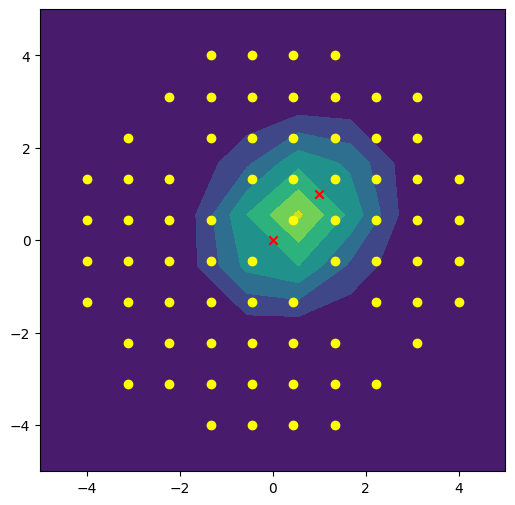

In [29]:
plt.figure()
plt.figure(figsize=(6,6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.scatter(successful_points_x, successful_points_y, color='yellow', label='Scattered Points')

plt.scatter(mu_x_target1, mu_y_target1, marker="x", color="red")
plt.scatter(mu_x_target2, mu_y_target2, marker="x", color="red")